In [135]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [136]:
# Upload Dataset into the notebook
airline=pd.read_csv("D:\CSV FIles Path\Assignments\Clustering\EastWestAirlines1.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [137]:
# Drop Column "Unique ID" from the origianl Dataset
airline=airline.drop(['ID#'],axis=1)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Setting Standard Scaler

In [138]:
#def minmax_func(i):
#x = (i-i.min())/(i.max()-i.min())
#return (x)

## Applying Normalisation Function which is Z SCORE

In [139]:
# Bring all the features to a similar scale. standarisation means centering the variable at zero
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [140]:
x=norm_func(airline.iloc[:,0:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline.iloc[:,0:])

In [142]:
scaled_airline_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Apply ELBOW METHOD TO FIND K VALUE

In [143]:
# Find optimum number of  cluster.(ELBOW METHOD). WCSS Means  within-cluster sum-of-squares.

wcss = [] # [] means We are creating LIST to store Cluster values.
for i in range(1, 11): #We are creating upto K=10 values (11-1)
    kmeans = KMeans(n_clusters=i,random_state=0) 
    kmeans.fit(scaled_airline_df) # We are fitingt K values
    wcss.append(kmeans.inertia_) # We are calculating average distance within a Cluster and Append that to our LIST wcss

## Plotting the K Mean Cluster for Visualization

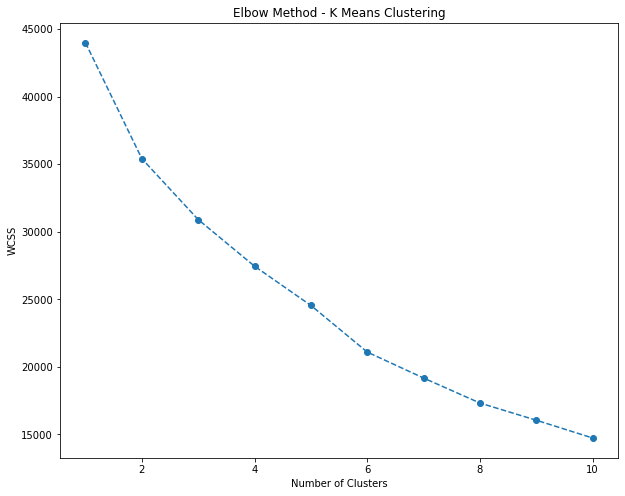

In [144]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker ='o',linestyle = '--')
plt.title('Elbow Method - K Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 ## Build K MEANS Cluster algorithm. K = 3

In [145]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=3,random_state=42)
clusters.fit_predict(scaled_airline_df)
# 4 Means: we have taken K=4 as our clusters based on above visualisation.
# Random_state=42, means we are randomly dividing the entire data into 42 rows for the initial Centroid
clusters.labels_
#kmeans.cluster_centers_.shape

array([2, 2, 2, ..., 0, 2, 2])

## Add Cluster to the Original Dataset

In [146]:
airline['Clusterid_New'] = clusters.labels_
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid_New
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


## Calculate the Centroids of each Clusters

In [147]:
clusters.cluster_centers_

array([[ 0.43048887,  0.01642516,  1.21446998, -0.08210144,  0.11218848,
         0.96375606,  0.76629019, -0.08399898, -0.09536197,  0.3709822 ,
         0.58512867],
       [ 1.23330946,  0.82316979,  0.06616141,  0.14658734,  0.09152624,
         0.59705278,  1.61043356,  3.50959072,  3.77863606,  0.29612364,
         0.90472058],
       [-0.29009901, -0.061121  , -0.59829079,  0.03070404, -0.06077648,
        -0.50989885, -0.47866796, -0.18525149, -0.19704462, -0.20055288,
        -0.34454569]])

In [148]:
# Value counts under Each Cluster
airline['Clusterid_New'].value_counts()

2    2574
0    1259
1     166
Name: Clusterid_New, dtype: int64

In [149]:
#airline['Clusterid_New']=airline['Clusterid_New'].replace(0, 'Cluster 1')
#airline['Clusterid_New']=airline['Clusterid_New'].replace(1, 'Cluster 2')
#airline['Clusterid_New']=airline['Clusterid_New'].replace(2, 'Cluster 3')
#airline['Clusterid_New']=airline['Clusterid_New'].replace(3, 'Cluster 4')
#airline['Clusterid_New']=airline['Clusterid_New'].replace(4, 'Cluster 5')
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid_New
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


## No. of value under each Cluster from the Original Dataset

In [150]:
airline['Clusterid_New'].value_counts()

2    2574
0    1259
1     166
Name: Clusterid_New, dtype: int64

## Average of each features within their Cluster

In [151]:
airline.groupby('Clusterid_New').agg(['mean']).T

,Clusterid_New,0,1,2
Balance,mean,116978.705322,197873.367470,44370.062160
Qual_miles,mean,156.820492,780.891566,96.833333
cc1_miles,mean,3.731533,2.150602,1.235820
cc2_miles,mean,1.002383,1.036145,1.019037
cc3_miles,mean,1.034154,1.030120,1.000389
Bonus_miles,mean,40417.577442,31562.445783,4831.835276
Bonus_trans,mean,18.960286,27.066265,7.005439
Flight_miles_12mo,mean,342.454329,5373.602410,200.697358
Flight_trans_12,mean,1.011914,15.704819,0.626263
Days_since_enroll,mean,4884.591739,4730.018072,3704.442502


## Visualization of Clusters with their Centriods

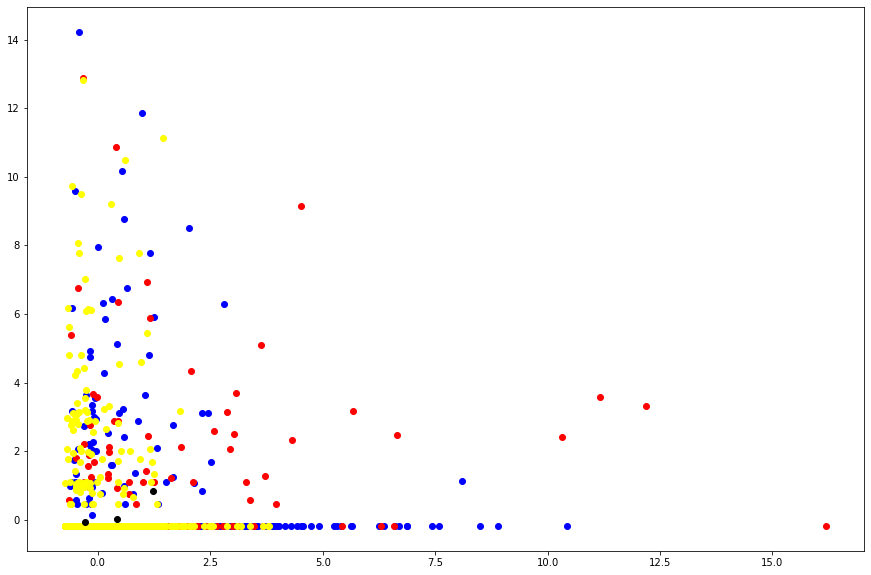

In [152]:
plt.figure(figsize=(15,10))
plt.scatter(scaled_airline_df[clusters.labels_ == 0,0], scaled_airline_df[clusters.labels_ == 0,1], c = 'blue')
plt.scatter(scaled_airline_df[clusters.labels_ == 1,0], scaled_airline_df[clusters.labels_ == 1,1], c = 'red')
plt.scatter(scaled_airline_df[clusters.labels_ == 2,0], scaled_airline_df[clusters.labels_ == 2,1], c = 'yellow')
plt.scatter(scaled_airline_df[clusters.labels_ == 3,0], scaled_airline_df[clusters.labels_ == 3,1], c = 'green')
#plt.scatter(scaled_airline_df[clusters.labels_ == 4,0], scaled_airline_df[clusters.labels_ == 4,1], c = 'purple')

plt.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], c = 'black', label = 'Centroids')
plt.show()


## Inferences: Above visualization clearly shows that the Cluster is of Non Sperical Shape and lot of outliers. The best Algorithm to deal with such data stucture is DBSCAN. Lets apply the  same dataset on DBSCAN Algorithm as the cluster is very dense.